# LATENT SEMANTIC INDEXING

**Latent Semantic Indexing (LSI)** is a technique used in information retrieval and natural language processing to discover hidden (latent) relationships between words and documents. It aims to overcome the limitations of traditional keyword-based search by capturing the semantic meaning behind terms.

At its core, LSI works by:

1. Creating a term-document matrix, where each row represents a unique term, each column represents a document, and each cell contains the frequency (or TF-IDF score) of the term in the document.
2. Applying Singular Value Decomposition (SVD) to this matrix. SVD reduces the high-dimensional term space into a lower-dimensional semantic space, where similar words and documents are grouped closer together based on their usage patterns—not just their exact terms.
3. Mapping both documents and queries into this semantic space, allowing the system to find relevant results even when the query and the documents don’t share exact keywords.

**NOTE**

For this presentation we will use a toy dataset:\
This is just done in order to let the user run the notebook within a reasonable time (The code works for larger collections, but the time required becomes non-negligible).\
It consists of 5 documents, each with a simple title that is repeated in the first line of the body of the document (the title is usually semantically relevant wrt the content of documents).\
This toy dataset is called 'Cat Encyclopedia' and contains some curiosities about cats, and it is AI-generated.

In [1]:
from data_handler import *
from term_document_matrix import *
from lsi import *
from fftq_handler import *
from lsi_ir import *

## DATA HANDLING AND PREPROCESSING

We decided to work with dot tagged collections.\
They are a type of collections where each document is sequentially inserted in the collection with all its information divided by simple header of the type ".X", where X is the type of information. In our datasets, we can find 5 fields of information:

1. I : index of the document
2. T : title of the document
3. A : author of the document
4. B : bibliographic info of the document
5. W : body of the document

There can be other fields, but these are the ones we found relevant.

The first thing we do is to parse the document into a dataframe, with 5 columns (one for each type of information) and a number of rows equal to the number of documents in the collection.

Once this is done, a new column is added to the dataframe: the __*clean_text*__ column. This column contains the required information from the document (e.g., title and body), after preprocessing.\
There exist many kinds of preprocessing. We decided to do the following:

1. decapitalization
2. punctuation removal 
3. stopwords removal
4. numbers removal
5. lemmatization
6. part-of-speech structure keeping

This new column contains all the information we need for the next step.\

**NOTE**

Since notebooks can sometimes have issues locating files, we use Tkinter to help retrieve the correct file path.\
However, we’ve found that the GUI window may not always pop up immediately. If this happens, simply minimize the notebook window, and the file selection dialog should appear.\
From there, select the appropriate dataset:\
`data/cat_encyclopedia/documents.all.5`, and then continue as normal.

In [2]:
import tkinter as tk
from tkinter.filedialog import askopenfilename

In [3]:
tk.Tk().withdraw() # we don't want a full GUI, so we keep the root window from appearing
path = askopenfilename() # show an "Open" dialog box and return the path to the selected file

parsed_df = parse_to_dataframe(path)
preproccesed_df = preprocess_for_lsi(parsed_df)

Now processing column W ...


100%|██████████| 5/5 [00:00<00:00, 61.10it/s]


## TERM DOCUMENT MATRIX

In [4]:
term_document_matrix, term_indexes = build_term_documents_mat(preproccesed_df)

## LATENT SEMANTIC INDEX

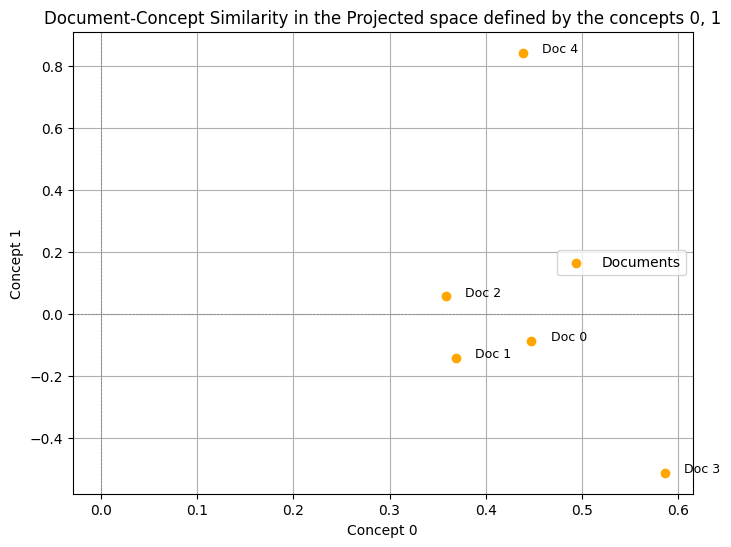

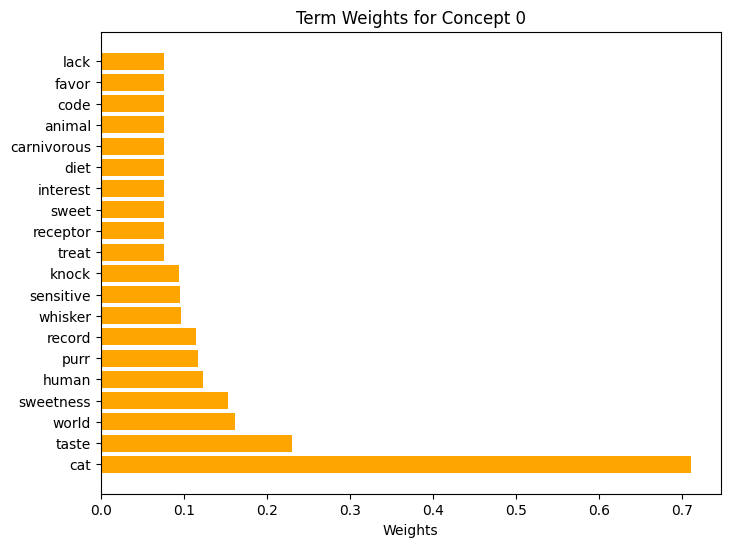

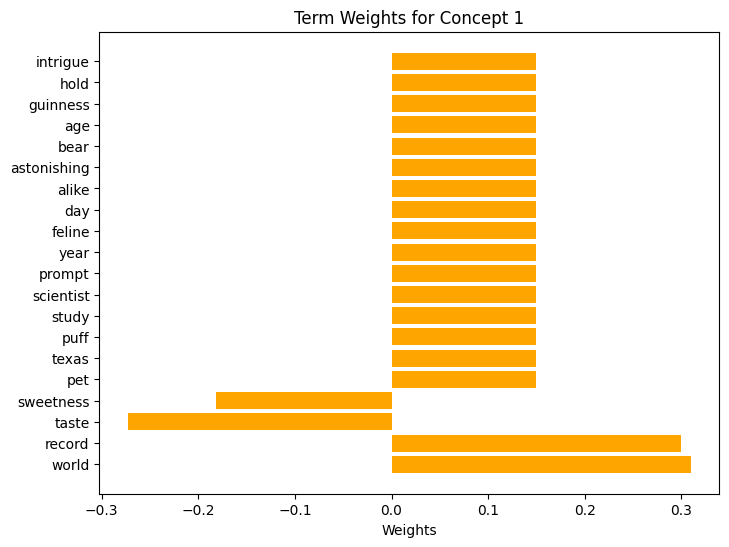

In [5]:
latent_semantic_indexing = LSI(term_document_matrix, n_components=2, terms_indexes=term_indexes)
latent_semantic_indexing.analyze_lsi_matrices()
latent_semantic_indexing.analyze_lsi_concepts_composition(concept_index=0)
latent_semantic_indexing.analyze_lsi_concepts_composition(concept_index=1)

## FREE FORM TEXT QUERY

The query is handled just as the documents in the collection.\
Of course we need to retrieve all the terms in the collection in order to vectorize the query, but this is not a problem.

In [6]:
query = "The cat purr?"
preprocessed_query = preprocess_query_for_lsi(query)
vector_query = term_query_vector(preprocessed_query, term_indexes)
print(vector_query)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## BRINGING IT ALL TOGETHER : LSI IR

Now we just need to put everything together, and we are good to go.

In [7]:
lsi_ir = LSI_IR(path, preprocess_protocol=None, boolean_matrix=False, n_components=2)
lsi_ir.retrieve(query)

Now processing column W ...


100%|██████████| 5/5 [00:00<00:00, 87.71it/s]


(2, 1)
(5, 2)
Doc 0 TITLE : THE MYSTERIOUS CAT PURR
 [Similarity: 0.998]
Doc 1 TITLE : WHISKERS: MORE THAN JUST A CUTE FEATURE
 [Similarity: 0.973]
Doc 2 TITLE : WHY DO CATS KNOCK THINGS OVER?
 [Similarity: 0.959]
Doc 3 TITLE : CATS CANNOT TASTE SWEETNESS
 [Similarity: 0.832]
Doc 4 TITLE : THE CAT WHO HOLDS A WORLD RECORD
 [Similarity: 0.343]


array([0, 1, 2, 3, 4])

## USING TF-IDF MATRIX INSTEAD OF TF MATRIX

Let's try to build the term-document matrix using TF-IDF instead of raw term counts.\
Here we will follow the same procedure as before, but instead of using the **term frequency (TF) matrix** alone, We will use the **TF-IDF matrix** to better capture the importance of terms across the document collection.

#### **Inverse Document Frequency (IDF)**

The **IDF** of a term \( t \) is defined as:

$$
\mathrm{idf}(t) = \log \left( \frac{N}{n_t} \right)
$$

Where:

- \( N \) is the total number of documents in the corpus  
- \( n_t \) is the number of documents containing the term \( t \)  
- A term \( 1 + n_t \) is sometimes added to avoid division by zero

#### **TF-IDF Weight**

The final **TF-IDF weight** for a term \( t \) in document \( d \) is computed as:

$$
\mathrm{tfidf}(t, d) = \mathrm{tf}(t, d) \cdot \mathrm{idf}(t)
$$


In [8]:
term_document_matrix, term_indexes = build_term_documents_mat(preproccesed_df)
doc_freq = compute_doc_freq(term_document_matrix)
idf = compute_idf(term_document_matrix, doc_freq)
term_document_matrix = build_tfidf_mat(term_document_matrix, idf)

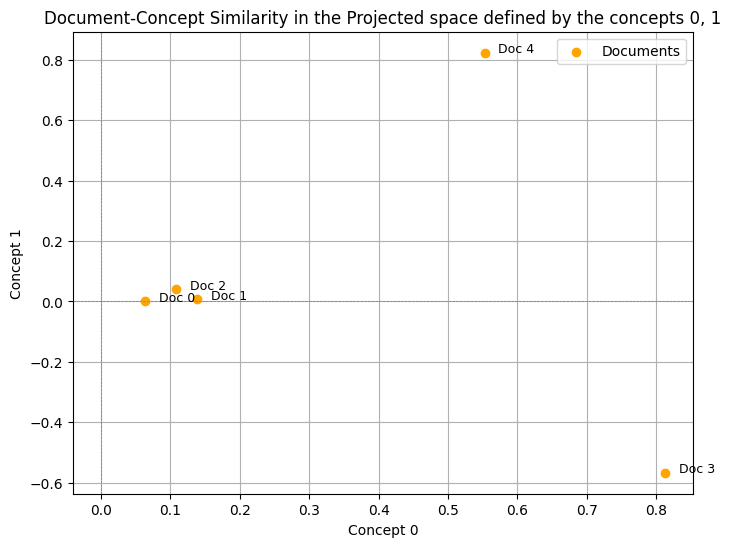

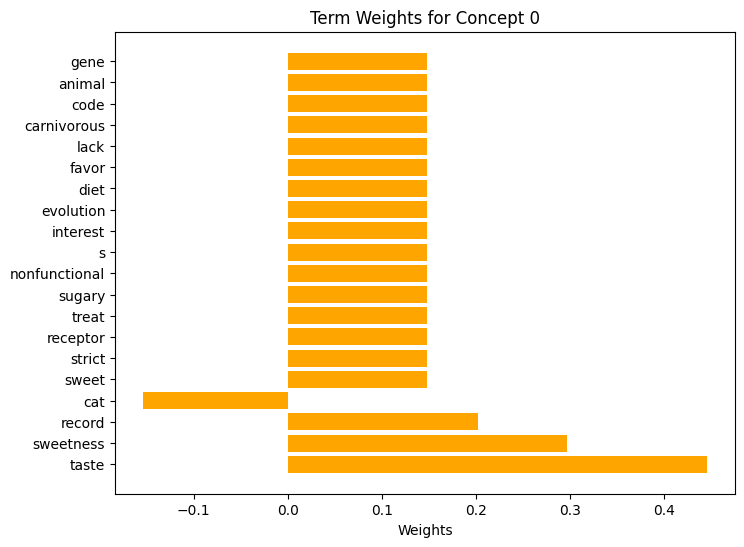

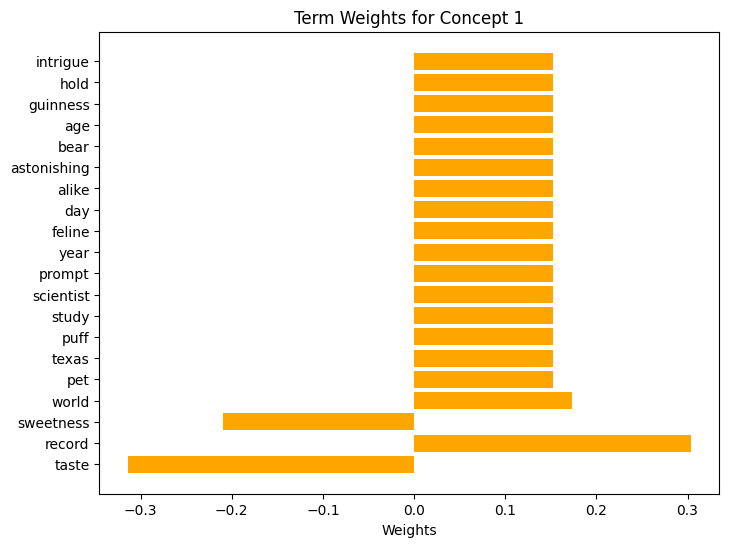

In [9]:
latent_semantic_indexing = LSI(term_document_matrix, n_components=2, terms_indexes=term_indexes)
latent_semantic_indexing.analyze_lsi_matrices()
latent_semantic_indexing.analyze_lsi_concepts_composition(concept_index=0)
latent_semantic_indexing.analyze_lsi_concepts_composition(concept_index=1)

In [10]:
query = "The cat purr?"
preprocessed_query = preprocess_query_for_lsi(query)
vector_query = term_query_vector(preprocessed_query, term_indexes)
print(vector_query)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
lsi_ir = LSI_IR(path, preprocess_protocol=None, boolean_matrix=False, n_components=2)
lsi_ir.retrieve(query)

Now processing column W ...


100%|██████████| 5/5 [00:00<00:00, 85.37it/s]


(2, 1)
(5, 2)
Doc 0 TITLE : THE MYSTERIOUS CAT PURR
 [Similarity: 0.998]
Doc 1 TITLE : WHISKERS: MORE THAN JUST A CUTE FEATURE
 [Similarity: 0.973]
Doc 2 TITLE : WHY DO CATS KNOCK THINGS OVER?
 [Similarity: 0.959]
Doc 3 TITLE : CATS CANNOT TASTE SWEETNESS
 [Similarity: 0.832]
Doc 4 TITLE : THE CAT WHO HOLDS A WORLD RECORD
 [Similarity: 0.343]


array([0, 1, 2, 3, 4])